In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('googleplaystore.csv')

In [5]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Problems:
1. rating > 5
2. Datatypes

   2.1 Numerical data = reviews, size, installs, price
   
   2.2 Datetime = last updated


3. We can split the genre column as written as: category; idea(genre)

4. Missing data in: Rating (1474), Type (1), Content Rating (1), Current ver (8), Android Ver (3) 

I will start with splitting the Genre Column

In [8]:
new_genres = df["Genres"].str.split(";", expand=True)
print(new_genres)

                       0             1
0           Art & Design          None
1           Art & Design  Pretend Play
2           Art & Design          None
3           Art & Design          None
4           Art & Design    Creativity
...                  ...           ...
10836          Education          None
10837          Education          None
10838            Medical          None
10839  Books & Reference          None
10840          Lifestyle          None

[10841 rows x 2 columns]


In [9]:
df["Genres"] = new_genres[1]

In [10]:
df[df["Genres"].isna()] 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,None,"January 7, 2018",1.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,None,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,None,"June 8, 2018",Varies with device,4.2 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,None,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,None,"April 26, 2018",1.1,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,None,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,None,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,None,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,None,"January 19, 2015",Varies with device,Varies with device


Some didn't have a genre, so will fill with the category name as it is.

In [11]:
df["Genres"] = df["Genres"].fillna(df["Category"])

1. Check the content rating

In [12]:
df[df["Content Rating"].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,1.9,1.0.19,4.0 and up,NaN


It has unrealistic category name and rating

Therefore I will drop it.

Dropping it solves rating > 5 and also the missing data in Content Rating.

In [13]:
not_realistic_category = df[df["Category"] == "1.9"].index
df.drop(not_realistic_category, axis=0, inplace=True)

Solving DataType of Reviews

In [14]:
df["Reviews"] =pd.to_numeric(df["Reviews"], errors="coerce")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.2+ MB


In [16]:
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

Checking is ratings = 0 due to no reviews

In [17]:
df[df["Reviews"] == 0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
478,Truth or Dare Pro,DATING,NaN,0,20M,50+,Paid,$1.49,Teen,DATING,"September 1, 2017",1.0,4.0 and up
479,"Private Dating, Hide App- Blue for PrivacyHider",DATING,NaN,0,18k,100+,Paid,$2.99,Everyone,DATING,"July 25, 2017",1.0.1,4.0 and up
621,Dating White Girls,DATING,NaN,0,3.6M,50+,Free,0,Mature 17+,DATING,"July 20, 2018",1.0,4.0 and up
623,Geeks Dating,DATING,NaN,0,13M,50+,Free,0,Mature 17+,DATING,"July 10, 2018",1.0,4.1 and up
627,CAM5678 Video Chat,DATING,NaN,0,39M,500+,Free,0,Mature 17+,DATING,"July 13, 2018",5.5.8,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10773,FQ India,LIFESTYLE,NaN,0,8.9M,10+,Free,0,Everyone,LIFESTYLE,"July 31, 2018",7.2.2,4.1 and up
10774,Miss FQ,NEWS_AND_MAGAZINES,NaN,0,36M,10+,Free,0,Everyone,NEWS_AND_MAGAZINES,"April 5, 2018",3.8,4.4 and up
10798,Word Search Tab 1 FR,FAMILY,NaN,0,1020k,50+,Paid,$1.04,Everyone,FAMILY,"February 6, 2012",1.1,3.0 and up
10822,PLMGSS FR,PRODUCTIVITY,NaN,0,3.1M,10+,Free,0,Everyone,PRODUCTIVITY,"December 1, 2017",1,4.4 and up


Make the Rating = 0 if we have 0 reviews

In [18]:
df.loc[(df['Rating'].isna()) & (df['Reviews'] == 0), 'Rating'] = 0

In [19]:
df[df["Rating"].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,BEAUTY,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,BEAUTY,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,BEAUTY,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,BEAUTY,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10823,List iptv FR,VIDEO_PLAYERS,NaN,1,2.9M,100+,Free,0,Everyone,VIDEO_PLAYERS,"April 22, 2018",1.0,4.0.3 and up
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,MEDICAL,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,SOCIAL,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,MAPS_AND_NAVIGATION,"June 13, 2018",2.0.148.0,4.0 and up


In [20]:
df.isna().sum()

App                 0
Category            0
Rating            878
Reviews             0
Size                0
Installs            0
Type                1
Price               0
Content Rating      0
Genres              0
Last Updated        0
Current Ver         8
Android Ver         2
dtype: int64

Many NaN values, so dropping them will affect the data.

I needed to check if there were any duplicates or if the category names were written incorrectly. 

In [21]:
df["Category"].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [22]:
df.groupby('Category')['Rating'].mean()

Category
ART_AND_DESIGN         4.288889
AUTO_AND_VEHICLES      3.972727
BEAUTY                 4.084091
BOOKS_AND_REFERENCE    3.868000
BUSINESS               3.277690
COMICS                 4.155172
COMMUNICATION          3.820728
DATING                 3.618224
EDUCATION              4.389032
ENTERTAINMENT          4.126174
EVENTS                 3.913725
FAMILY                 4.030765
FINANCE                3.948521
FOOD_AND_DRINK         3.849153
GAME                   4.239946
HEALTH_AND_FITNESS     3.957321
HOUSE_AND_HOME         3.938272
LIBRARIES_AND_DEMO     4.053731
LIFESTYLE              3.705476
MAPS_AND_NAVIGATION    3.925000
MEDICAL                3.533012
NEWS_AND_MAGAZINES     3.866667
PARENTING              4.300000
PERSONALIZATION        3.946377
PHOTOGRAPHY            4.127019
PRODUCTIVITY           3.790256
SHOPPING               4.154918
SOCIAL                 4.067159
SPORTS                 3.939474
TOOLS                  3.823423
TRAVEL_AND_LOCAL       3.869583

Now, we fill each NaN with the mean of its category.

In [23]:
df['Rating'] = df.groupby('Category')['Rating'].transform(lambda x: x.fillna(x.mean()))

Now, to convert datatype of Price we need to remove the $ sign.

In [24]:
df["Price"] =df["Price"].apply(lambda x: float(x.replace("$", "")))

In [25]:
df["Price"] = pd.to_numeric(df["Price"], errors="coerce")

Double checking that no free item has a price > 0

In [26]:
df[(df["Price"] == 0) & (df["Type"] == "Paid")]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


No data, therefore the data is correct. Free has price 0.

In [27]:
df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

As we see, a very small number of nan in the current version and Android version, so we can drop them.

In [28]:
df.dropna(inplace=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  int64  
 4   Size            10829 non-null  object 
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  float64
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last Updated    10829 non-null  object 
 11  Current Ver     10829 non-null  object 
 12  Android Ver     10829 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.2+ MB


Now, converting the datatype of last updated

In [30]:
df["Last Updated"] = pd.to_datetime(df["Last Updated"])

Now the Size part.
We can make all in Megabytes.

In [31]:
df["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.7M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

We need to divide the ones having KB by 1000

In [32]:
df["Size_MB"] = df["Size"].apply(lambda x: float(x.replace("M", "")) if "M" in x else float(x.replace("k", "")) / 1000 if "k" in x else x)

In [33]:
df.drop("Size", axis=1, inplace=True)

We need to figure out how we would feed this column to model when it has numbers and texts

In [34]:
df.sample(10)

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_MB
8277,FOX 5 DC,NEWS_AND_MAGAZINES,4.5,1440,"100,000+",Free,0.0,Everyone,NEWS_AND_MAGAZINES,2018-03-29,1.3.35.0,4.0 and up,12.0
4586,Tumblr,SOCIAL,4.4,2953886,"100,000,000+",Free,0.0,Mature 17+,SOCIAL,2018-08-01,Varies with device,Varies with device,Varies with device
104,Hairstyles step by step,BEAUTY,4.6,4369,"100,000+",Free,0.0,Everyone,BEAUTY,2018-07-25,1.9,4.0.3 and up,14.0
10729,MX Player Codec (ARMv7),LIBRARIES_AND_DEMO,4.3,332083,"10,000,000+",Free,0.0,Everyone,LIBRARIES_AND_DEMO,2018-04-23,1.9.19,4.0 and up,6.3
3072,ESPN,SPORTS,4.2,521140,"10,000,000+",Free,0.0,Everyone 10+,SPORTS,2018-07-19,Varies with device,5.0 and up,Varies with device
8507,GirlTalk.dk,SOCIAL,4.3,3,100+,Free,0.0,Teen,SOCIAL,2017-09-22,3.1.0,4.1 and up,5.3
4657,Wi u Emulator,FAMILY,2.4,468,"10,000+",Free,0.0,Everyone,FAMILY,2018-03-03,0.0.1,4.1 and up,7.2
3352,Nova Launcher,PERSONALIZATION,4.6,1121805,"50,000,000+",Free,0.0,Everyone,PERSONALIZATION,2018-05-14,Varies with device,Varies with device,Varies with device
10,Text on Photo - Fonteee,ART_AND_DESIGN,4.4,13880,"1,000,000+",Free,0.0,Everyone,ART_AND_DESIGN,2017-10-27,1.0.4,4.1 and up,28.0
3102,"Expedia Hotels, Flights & Car Rental Travel Deals",TRAVEL_AND_LOCAL,4.1,136626,"10,000,000+",Free,0.0,Everyone,TRAVEL_AND_LOCAL,2018-08-06,18.30.0,5.0 and up,14.0


To make all data ready for later machine learning analysis, we will convert the "Varies with device" in Size_MB to NaN, then fill with median based on category.

In [35]:
df["Size_MB"] = pd.to_numeric(df["Size_MB"], errors="coerce")

In [36]:
df["Size_MB"] = df.groupby('Category')['Size_MB'].transform(lambda x: x.fillna(x.median()))

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10829 non-null  object        
 1   Category        10829 non-null  object        
 2   Rating          10829 non-null  float64       
 3   Reviews         10829 non-null  int64         
 4   Installs        10829 non-null  object        
 5   Type            10829 non-null  object        
 6   Price           10829 non-null  float64       
 7   Content Rating  10829 non-null  object        
 8   Genres          10829 non-null  object        
 9   Last Updated    10829 non-null  datetime64[ns]
 10  Current Ver     10829 non-null  object        
 11  Android Ver     10829 non-null  object        
 12  Size_MB         10829 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(8)
memory usage: 1.2+ MB


Installs column must be numerical.

In [38]:
df["Installs"] = df["Installs"].str.replace("+" , "").str.replace(",", "")

In [39]:
df["Installs"] = pd.to_numeric(df["Installs"], errors="coerce")

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10829 non-null  object        
 1   Category        10829 non-null  object        
 2   Rating          10829 non-null  float64       
 3   Reviews         10829 non-null  int64         
 4   Installs        10829 non-null  int64         
 5   Type            10829 non-null  object        
 6   Price           10829 non-null  float64       
 7   Content Rating  10829 non-null  object        
 8   Genres          10829 non-null  object        
 9   Last Updated    10829 non-null  datetime64[ns]
 10  Current Ver     10829 non-null  object        
 11  Android Ver     10829 non-null  object        
 12  Size_MB         10829 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 1.2+ MB


### Outlier checking

1. Ratings can't be > installs

In [41]:
df[df["Reviews"] >= df["Installs"]]

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_MB
2454,KBA-EZ Health Guide,MEDICAL,5.000000,4,1,Free,0.00,Everyone,MEDICAL,2018-08-02,1.0.72,4.0.3 and up,25.000
4465,Popsicle Launcher for Android P 9.0 launcher,PERSONALIZATION,0.000000,0,0,Paid,1.49,Everyone,PERSONALIZATION,2018-07-11,1.1,4.2 and up,5.500
4550,RMEduS - 음성인식을 활용한 R 프로그래밍 실습 시스템,FAMILY,4.030765,4,1,Free,0.00,Everyone,FAMILY,2018-07-17,1.0.1,4.4 and up,64.000
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.800000,10249,10000,Paid,2.49,Everyone,LIFESTYLE,2018-07-30,Varies with device,Varies with device,9.700
5307,Ak Parti Yardım Toplama,SOCIAL,0.000000,0,0,Paid,13.99,Teen,SOCIAL,2017-07-28,3.4.4.3.3,4.1 and up,8.700
5486,AP Series Solution Pro,FAMILY,0.000000,0,0,Paid,1.99,Everyone,FAMILY,2017-07-30,1.3,4.0 and up,7.400
5500,AQ Math Facts,FAMILY,4.030765,1,1,Paid,2.99,Everyone,FAMILY,2017-05-17,1.0.3,4.0 and up,16.000
5812,AX Watch for WatchMaker,PERSONALIZATION,3.946377,2,1,Paid,0.99,Everyone,PERSONALIZATION,2017-08-18,1.0,2.3 and up,0.238
5917,Ra Ga Ba,GAME,5.000000,2,1,Paid,1.49,Everyone,GAME,2017-02-08,1.0.4,2.3 and up,20.000
5945,Ain Arabic Kids Alif Ba ta,FAMILY,0.000000,0,0,Paid,2.99,Everyone,FAMILY,2016-04-15,1.0,3.0 and up,33.000


As we can see, some number of reviews are more than the installs. Not logic.

We will make an assumption that reviews == installs for them rather than deleting the rows.

We are going to make the installs == reviews not vice versa as in the original dataset we had the installs as: (__+), so they may be more but not specifying exactly how much.

In [42]:
df.loc[df["Reviews"] >= df["Installs"], "Installs"] = df["Reviews"]

In [43]:
df[df["Reviews"] > df["Installs"]]

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_MB


2. Price.

We are going to create a new dataframe for the paid apps only.

1. Statistic method

In [44]:
# We will be using IQR method to detect the outliers in the Price column
paid_apps = df[df["Price"] > 0]
Q1 = paid_apps['Price'].quantile(0.25)
Q3 = paid_apps['Price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
paid_apps[(paid_apps['Price'] < lower_bound) | (paid_apps['Price'] > upper_bound)]


,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_MB
2251,Human Anatomy Atlas 2018: Complete 3D Human Body,MEDICAL,4.50000,2921,100000,Paid,24.99,Everyone,MEDICAL,2018-05-25,2018.5.47,5.0 and up,25.0
2252,Essential Anatomy 3,MEDICAL,4.10000,1533,50000,Paid,11.99,Mature 17+,MEDICAL,2014-08-07,1.1.3,4.0.3 and up,42.0
2253,Vargo Anesthesia Mega App,MEDICAL,4.60000,92,1000,Paid,79.99,Everyone,MEDICAL,2018-06-18,19.0,4.0.3 and up,32.0
2254,EMT Review Plus,MEDICAL,4.50000,199,10000,Paid,11.99,Everyone,MEDICAL,2018-06-27,3.0.5,4.4W and up,1.8
2256,2017 EMRA Antibiotic Guide,MEDICAL,4.40000,12,1000,Paid,16.99,Everyone,MEDICAL,2017-01-27,1.0.5,4.0.3 and up,3.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9730,Lean EQ,BUSINESS,3.27769,6,10,Paid,89.99,Everyone,BUSINESS,2017-02-14,1.0,4.1 and up,10.0
9905,Eu sou Rico,FINANCE,0.00000,0,0,Paid,30.99,Everyone,FINANCE,2018-01-09,1.0,4.0 and up,2.6
9917,Eu Sou Rico,FINANCE,0.00000,0,0,Paid,394.99,Everyone,FINANCE,2018-07-11,1.0,4.0.3 and up,1.4
9934,I'm Rich/Eu sou Rico/أنا غني/我很有錢,LIFESTYLE,0.00000,0,0,Paid,399.99,Everyone,LIFESTYLE,2017-12-01,MONEY,4.1 and up,40.0


2. Visualization method.

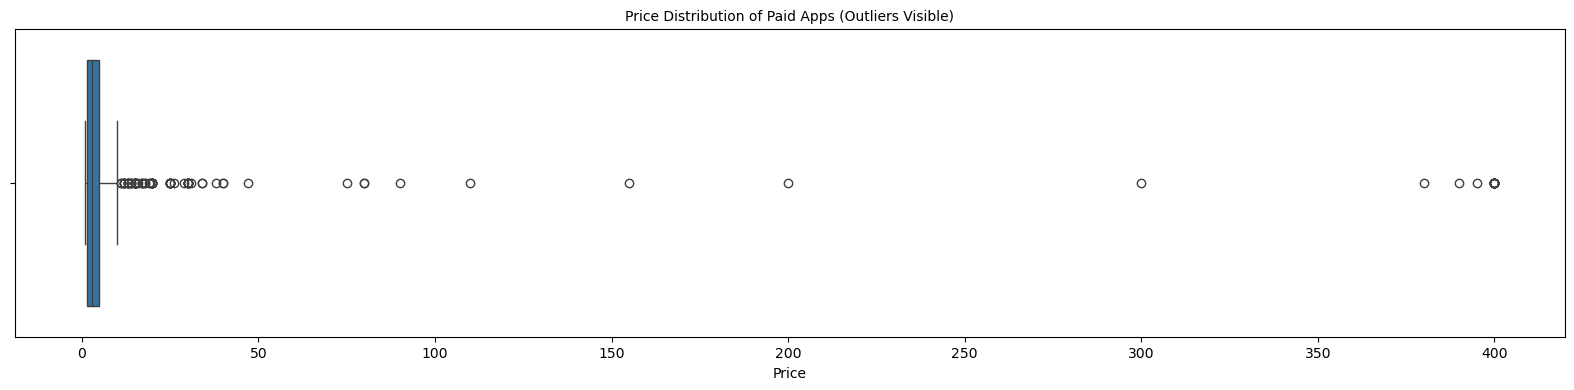

In [45]:
plt.figure(figsize=(20,4))
sns.boxplot(x=paid_apps['Price'])
plt.title("Price Distribution of Paid Apps (Outliers Visible)", fontsize=10)
plt.show()

We got many extreme prices which is not logical for the play store such as the price = 400$.
We are going to leave them for later analysis.

3. Size_MB

1. Statistical method.

In [46]:
Q1 = df['Size_MB'].quantile(0.25)
Q3 = df['Size_MB'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df[(df['Size_MB'] < lower_bound) | (df['Size_MB'] > upper_bound)]

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_MB
169,English Persian Dictionary,BOOKS_AND_REFERENCE,4.500000,26875,500000,Free,0.0,Everyone,BOOKS_AND_REFERENCE,2018-08-01,6.0.8,4.0.3 and up,73.0
379,My Vodacom SA,COMMUNICATION,3.700000,25021,5000000,Free,0.0,Everyone,COMMUNICATION,2018-06-26,9.9.0,4.3 and up,61.0
380,Microsoft Edge,COMMUNICATION,4.300000,27187,5000000,Free,0.0,Everyone,COMMUNICATION,2018-07-28,42.0.0.2059,4.4 and up,66.0
569,"SweetRing - Meet, Match, Date",DATING,4.000000,51698,1000000,Free,0.0,Mature 17+,DATING,2018-07-26,3.0.0,4.0.3 and up,63.0
600,"iPair-Meet, Chat, Dating",DATING,4.500000,182986,5000000,Free,0.0,Mature 17+,DATING,2018-08-02,5.0.8,4.1 and up,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10783,Modern Counter Terror Attack – Shooting Game,GAME,4.200000,340,50000,Free,0.0,Mature 17+,GAME,2017-10-27,1.0,4.1 and up,72.0
10784,Big Hunter,GAME,4.300000,245455,10000000,Free,0.0,Everyone 10+,GAME,2018-05-31,2.8.6,4.0 and up,84.0
10793,Sid Story,GAME,4.400000,28510,500000,Free,0.0,Teen,GAME,2018-08-01,2.6.6,4.0.3 and up,78.0
10803,Fatal Raid - No.1 Mobile FPS,GAME,4.300000,56496,1000000,Free,0.0,Teen,GAME,2018-08-07,1.5.447,4.0 and up,81.0


2. Visualization method.

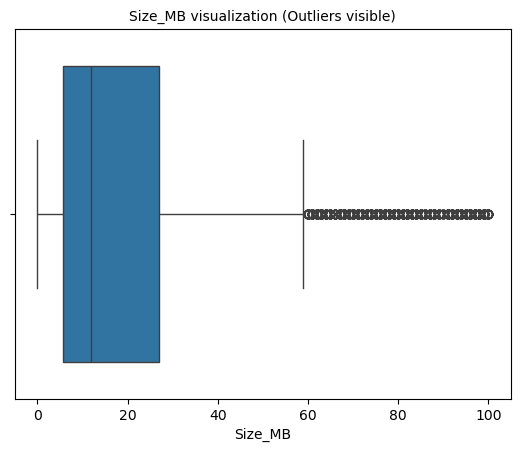

In [47]:
sns.boxplot(x=df['Size_MB'])
plt.title("Size_MB visualization (Outliers visible)", fontsize=10)
plt.show()


## Some Analytic Questions To Answer

## 1. Most expensive app in the play store.

In [48]:
max_price_row = df[df["Price"] == df["Price"].max()]
app_name = max_price_row["App"].values[0]
price = max_price_row["Price"].values[0]
print(f"The most expensive app is '{app_name}' priced at ${price}")

The most expensive app is 'I'm Rich - Trump Edition' priced at $400.0


/var/folders/yy/p245jml91f9f3v3whpztlz6w0000gn/T/ipykernel_3630/2311294875.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Price', y='App', data=top_expensive, palette = "magma")
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128142 (\N{GEM STONE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25105 (\N{CJK UNIFIED IDEOGRAPH-6211}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24456 (\N{CJK UNIFIED IDEOGRAPH-5F88}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.12/site-packages/IPyth

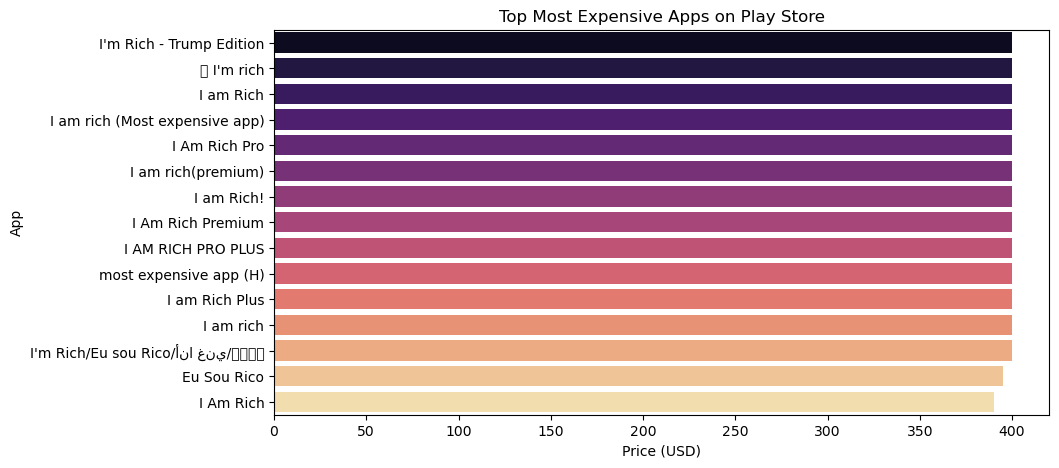

In [49]:
top_expensive = df.sort_values(by='Price', ascending=False).head(15)
plt.figure(figsize=(10,5))
sns.barplot(x='Price', y='App', data=top_expensive, palette = "magma")
plt.title("Top Most Expensive Apps on Play Store")
plt.xlabel("Price (USD)")
plt.ylabel("App")
plt.show()

## 2. Genre that has highest number of apps.

In [50]:
genre_counts = df['Genres'].value_counts()
top_genre = genre_counts.idxmax()
top_genre_count = genre_counts.max()
print(f"The genre with the highest number of apps is '{top_genre}' with {top_genre_count} apps.")

The genre with the highest number of apps is 'FAMILY' with 1551 apps.


/var/folders/yy/p245jml91f9f3v3whpztlz6w0000gn/T/ipykernel_3630/1973185782.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.head(10).values, y=genre_counts.head(10).index, palette="viridis")


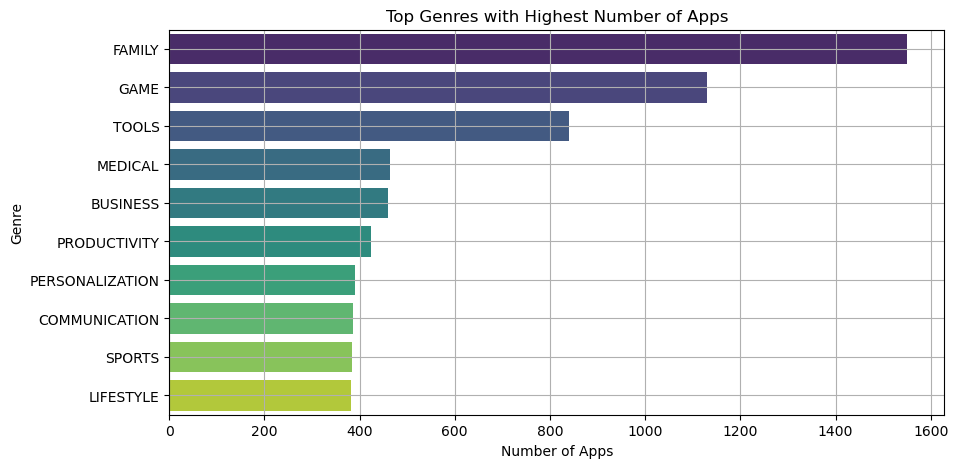

In [51]:
plt.figure(figsize=(10,5))
sns.barplot(x=genre_counts.head(10).values, y=genre_counts.head(10).index, palette="viridis")
plt.grid()
plt.title("Top Genres with Highest Number of Apps")
plt.xlabel("Number of Apps")
plt.ylabel("Genre")
plt.show()

## 3. The average size of free vs. paid apps

In [52]:
avg_size_apps = df.groupby('Type')['Size_MB'].mean()
print(f"The average size of free apps is {avg_size_apps['Free']:.2f} MB, while the average size of paid apps is {avg_size_apps['Paid']:.2f} MB.")

The average size of free apps is 20.46 MB, while the average size of paid apps is 18.81 MB.


/var/folders/yy/p245jml91f9f3v3whpztlz6w0000gn/T/ipykernel_3630/12735736.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_size_apps.index, y=avg_size_apps.values, palette="viridis")


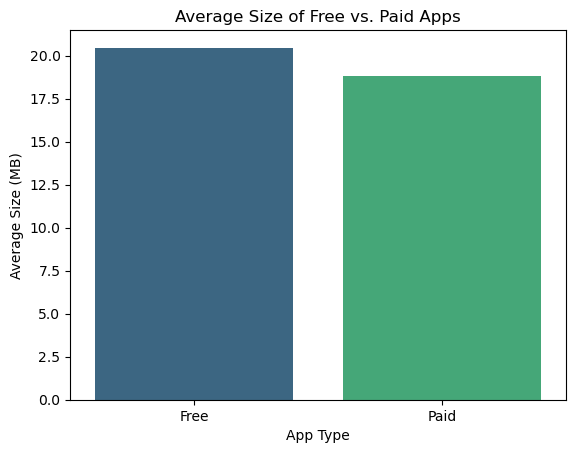

In [53]:
sns.barplot(x=avg_size_apps.index, y=avg_size_apps.values, palette="viridis")
plt.title("Average Size of Free vs. Paid Apps")
plt.xlabel("App Type")
plt.ylabel("Average Size (MB)")
plt.show()

## 4. The top 5 most expensive apps with a perfect rating (5)

In [54]:
top_rated_expensive = df[df["Rating"] == 5].sort_values(by="Price", ascending=False).head(5)
print(top_rated_expensive[["App", "Price", "Rating"]])

                                            App  Price  Rating
5489                  AP Art History Flashcards  29.99     5.0
7477                 USMLE Step 2 CK Flashcards  19.99     5.0
5246                      Hey AJ! It's Bedtime!   4.99     5.0
7204  TI-84 CE Graphing Calculator Manual TI 84   4.99     5.0
5482                 meStudying: AP English Lit   4.99     5.0


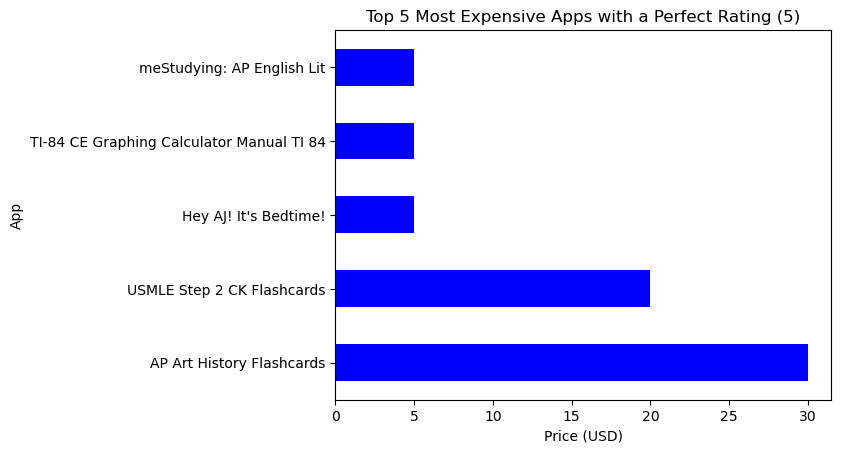

In [55]:
top_rated_expensive.plot(x='App', y='Price', kind='barh', color='blue', legend=False)
plt.title("Top 5 Most Expensive Apps with a Perfect Rating (5)")
plt.xlabel("Price (USD)")
plt.ylabel("App")
plt.show()

## 5. How many apps have received more than 50K reviews

In [56]:
count_apps = df[df["Installs"] > 50000]
print(f"Number of apps with more than 50K reviews: {count_apps.shape[0]} apps")

Number of apps with more than 50K reviews: 6117 apps


/var/folders/yy/p245jml91f9f3v3whpztlz6w0000gn/T/ipykernel_3630/2431902440.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['>50K Installs', '<=50K Installs'], y=[apps_above_50k.shape[0], apps_below_50k.shape[0]], palette="pastel")


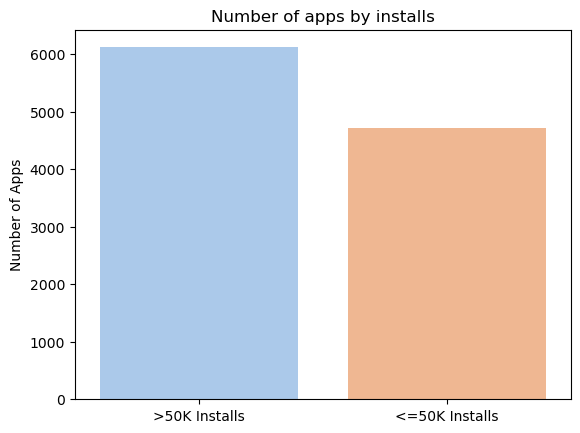

In [57]:
apps_above_50k = df[df["Installs"] > 50000]
apps_below_50k = df[df["Installs"] <= 50000]
sns.barplot(x=['>50K Installs', '<=50K Installs'], y=[apps_above_50k.shape[0], apps_below_50k.shape[0]], palette="pastel")
plt.title("Number of apps by installs")
plt.ylabel("Number of Apps")
plt.show()


## 6. The average price of apps, grouped by genre and number of installs

In [58]:
df.groupby(['Genres', 'Installs'])["Price"].mean().reset_index()

,Genres,Installs,Price
0,ART_AND_DESIGN,0,0.000000
1,ART_AND_DESIGN,100,0.000000
2,ART_AND_DESIGN,1000,0.663333
3,ART_AND_DESIGN,5000,0.497500
4,ART_AND_DESIGN,10000,0.199000
...,...,...,...
583,WEATHER,500000,0.855714
584,WEATHER,1000000,0.000000
585,WEATHER,5000000,0.000000
586,WEATHER,10000000,0.000000


I got the average of installs and average price for those.

In [59]:
df.groupby('Genres')[['Installs', 'Price']].mean().reset_index().sort_values(by='Price', ascending=False)

,Genres,Installs,Price
16,FINANCE,2.395215e+06,7.925765
22,LIFESTYLE,1.384892e+06,6.196509
24,MEDICAL,1.150269e+05,3.110065
13,EVENTS,2.495806e+05,1.718594
15,FAMILY,4.703712e+06,1.411941
31,Pretend Play,5.200269e+06,0.969111
30,PRODUCTIVITY,3.343418e+07,0.591816
4,BOOKS_AND_REFERENCE,8.354211e+06,0.520739
6,Brain Games,4.104344e+06,0.512714
2,Action & Adventure,1.589867e+07,0.498623


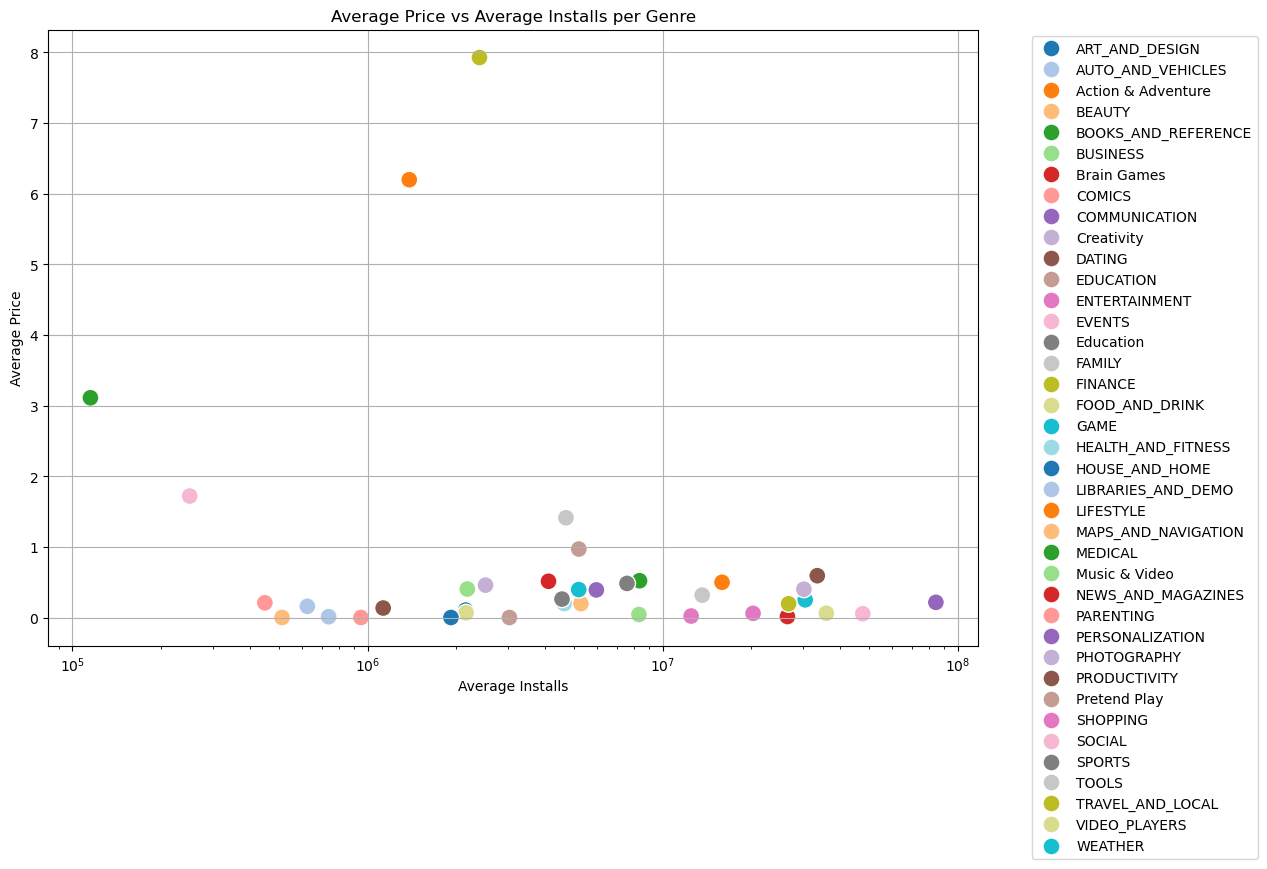

In [60]:
genre_summary = df.groupby('Genres')[['Installs', 'Price']].mean().reset_index()
plt.figure(figsize=(12,8))
sns.scatterplot(data=genre_summary, x='Installs', y='Price', hue='Genres', palette='tab20', s=150)
plt.xscale('log')
plt.xlabel('Average Installs')
plt.ylabel('Average Price')
plt.title('Average Price vs Average Installs per Genre')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()


## 7. How many apps have a rating higher than 4.7, and what is their average price?

In [82]:
apps_above = df[df["Rating"] > 4.7].count()
print(f"Number of apps with rating above 4.7: {apps_above[0]} apps")

Number of apps with rating above 4.7: 595 apps


/var/folders/yy/p245jml91f9f3v3whpztlz6w0000gn/T/ipykernel_3630/2107037343.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Number of apps with rating above 4.7: {apps_above[0]} apps")


In [73]:
avg_price_apps_above = df[df["Rating"] > 4.7]["Price"].mean()
print(f"The average price of apps with rating above 4.7 is ${avg_price_apps_above:.2f}")

The average price of apps with rating above 4.7 is $0.50


Average price of apps with rating less than or equal 4.7: $1.06
Average price of apps with rating above 4.7: $0.50


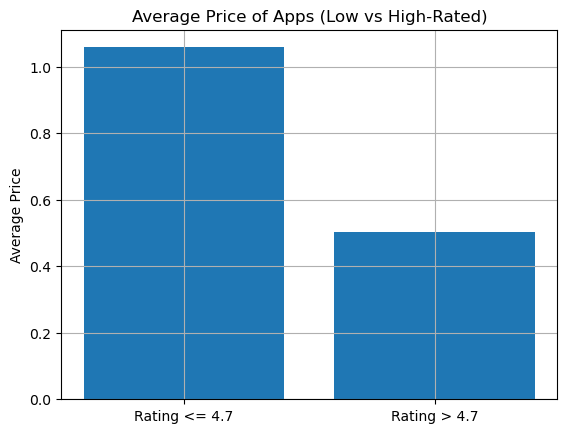

In [80]:
avg_high = df[df["Rating"] > 4.7]["Price"].mean()
avg_below = df[df["Rating"] <= 4.7]["Price"].mean()

print(f"Average price of apps with rating less than or equal 4.7: ${avg_below:.2f}")
print(f"Average price of apps with rating above 4.7: ${avg_high:.2f}")
plt.bar(["Rating <= 4.7", "Rating > 4.7"], [avg_below, avg_high])
plt.ylabel("Average Price")
plt.title("Average Price of Apps (Low vs High-Rated)")
plt.grid()
plt.show()

## 8.What is Google's estimated revenue from apps with 5,000,000+ installs?
                    (Assuming Google takes a 30% cut from app sales)                

In [94]:
no_of_apps = df[df["Installs"] >= 5000000].count()
no_of_paid_apps = df[(df["Installs"] >= 5000000) & (df["Type"] == "Paid")].count()
total_sales = df[(df["Installs"] >= 5000000) & (df["Type"] == "Paid")]["Price"].sum()
revenue = total_sales * 0.3
print(f"Number of apps with 5,000,000+ installs: {no_of_apps[0]} apps")
print(f"Number of paid apps with 5,000,000+ installs: {no_of_paid_apps[0]} apps")
print(f"Total sales from paid apps with 5,000,000+ installs: ${total_sales:,.2f}")
print(f"Google's estimated revenue from paid apps with 5,000,000+ installs is approximately ${revenue:,.2f}")

Number of apps with 5,000,000+ installs: 2832 apps
Number of paid apps with 5,000,000+ installs: 3 apps
Total sales from paid apps with 5,000,000+ installs: $14.97
Google's estimated revenue from paid apps with 5,000,000+ installs is approximately $4.49


/var/folders/yy/p245jml91f9f3v3whpztlz6w0000gn/T/ipykernel_3630/145153970.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Number of apps with 5,000,000+ installs: {no_of_apps[0]} apps")
/var/folders/yy/p245jml91f9f3v3whpztlz6w0000gn/T/ipykernel_3630/145153970.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Number of paid apps with 5,000,000+ installs: {no_of_paid_apps[0]} apps")


## 9. What are the maximum and minimum sizes of free vs. paid apps?

In [103]:
max_paid = df[df["Type"] == "Paid"]["Size_MB"].max()
min_paid = df[df["Type"] == "Paid"]["Size_MB"].min()
avg_paid = df[df["Type"] == "Paid"]["Size_MB"].mean()

max_free = df[df["Type"] == "Free"]["Size_MB"].max()
min_free = df[df["Type"] == "Free"]["Size_MB"].min()
avg_free = df[df["Type"] == "Free"]["Size_MB"].mean()

print(f"Maximum size of free apps {max_free}, while minimum size is {min_free}")
print(f"Maximum size of paid apps {max_paid}, while minimum size is {min_paid}")
print(f"Average size of free apps {avg_free:.2f}, while average size of paid apps is {avg_paid:.2f}")

Maximum size of free apps 100.0, while minimum size is 0.0085
Maximum size of paid apps 100.0, while minimum size is 0.014
Average size of free apps 20.46, while average size of paid apps is 18.81


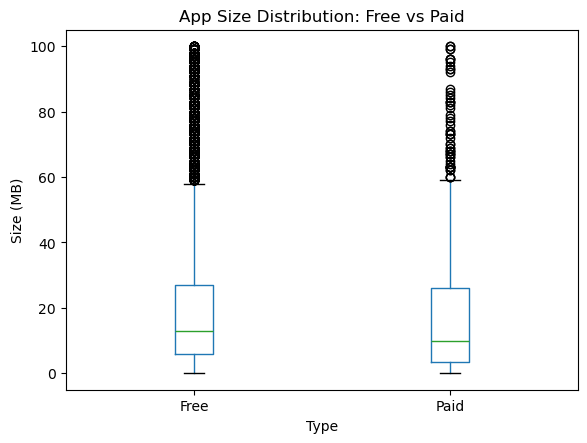

In [100]:
df.boxplot(column="Size_MB", by="Type", grid=False)
plt.title("App Size Distribution: Free vs Paid")
plt.suptitle("")  # remove default "Boxplot grouped by Type"
plt.ylabel("Size (MB)")
plt.show()

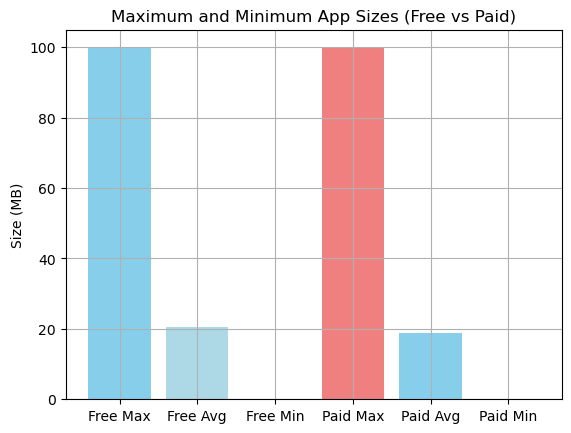

In [109]:
sizes = {"Free Max": max_free, "Free Avg": avg_free, "Free Min": min_free, "Paid Max": max_paid,"Paid Avg": avg_paid, "Paid Min": min_paid}
plt.bar(sizes.keys(), sizes.values(), color=["skyblue", "lightblue", "salmon", "lightcoral"])
plt.title("Maximum and Minimum App Sizes (Free vs Paid)")
plt.grid()
plt.ylabel("Size (MB)")
plt.show()

## 10.  Is there a correlation between an app’s rating, number of reviews, size, and its price?

In [110]:
corr = df[["Rating", "Reviews", "Size_MB", "Price"]].corr()
print(corr)

           Rating   Reviews   Size_MB     Price
Rating   1.000000  0.066929  0.101078 -0.031267
Reviews  0.066929  1.000000  0.097741 -0.009674
Size_MB  0.101078  0.097741  1.000000 -0.019568
Price   -0.031267 -0.009674 -0.019568  1.000000


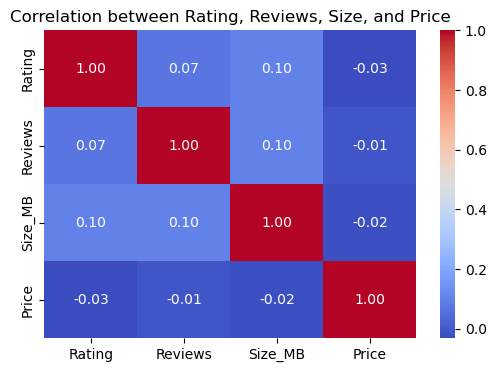

In [111]:
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between Rating, Reviews, Size, and Price")
plt.show()

## 11. How many apps exist for each type (free/paid) across different content ratings?

In [113]:
apps_by_type_content = df.groupby("Type")["Content Rating"].value_counts()
print(apps_by_type_content)

Type  Content Rating 
Free  Everyone           8012
      Teen               1156
      Mature 17+          479
      Everyone 10+        380
      Adults only 18+       3
      Unrated               2
Paid  Everyone            692
      Teen                 52
      Everyone 10+         33
      Mature 17+           20
Name: count, dtype: int64


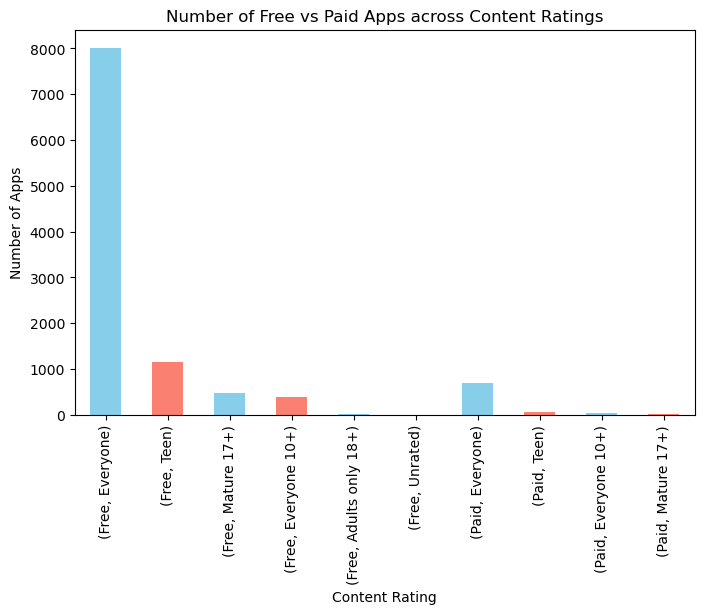

In [116]:
apps_by_type_content.plot(kind="bar", stacked=True, figsize=(8,5), color=["skyblue", "salmon"])
plt.title("Number of Free vs Paid Apps across Content Ratings")
plt.xlabel("Content Rating")
plt.ylabel("Number of Apps")
plt.show()

## 12. How many apps are compatible with Android version 4.x?

In [121]:
android_4_apps = df[df["Android Ver"].str.startswith("4")]
count_android_4 = android_4_apps.count()[0]
print(f"Number of apps compatible with Android version 4.x: {count_android_4} apps")

Number of apps compatible with Android version 4.x: 6956 apps


/var/folders/yy/p245jml91f9f3v3whpztlz6w0000gn/T/ipykernel_3630/3323415374.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count_android_4 = android_4_apps.count()[0]


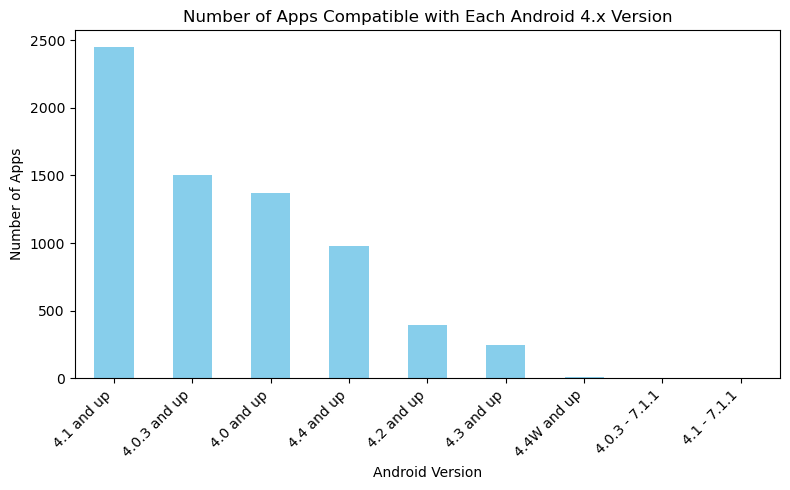

In [ ]:
version_counts = android_4_apps["Android Ver"].value_counts()
version_counts.plot(kind="bar", figsize=(8,5), color="skyblue")
plt.title("Number of Apps Compatible with Each Android 4.x Version")
plt.xlabel("Android Version")
plt.ylabel("Number of Apps")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
